In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2022-12-17 21:12:01--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 172.253.117.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   222MB/s    in 0.6s    

2022-12-17 21:12:02 (222 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

In [3]:
local_zip = '/tmp/horse-or-human.zip'

In [4]:
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [5]:
zip_ref.extractall('/tmp/horse-or-human/')

In [6]:
zip_ref.close()

In [7]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

In [8]:
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [9]:
os.listdir(train_horse_dir)[:5]

['horse24-1.png',
 'horse49-9.png',
 'horse20-1.png',
 'horse25-8.png',
 'horse45-3.png']

In [10]:
os.listdir(train_human_dir)[:5]

['human07-04.png',
 'human11-04.png',
 'human08-26.png',
 'human14-21.png',
 'human05-22.png']

In [11]:
print(len(os.listdir(train_human_dir)))

527


In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [14]:
ncols = 4
nrows = 4

pic_index = 0

In [15]:
train_horse_names = os.listdir('/tmp/horse-or-human/horses')
train_human_names = os.listdir(train_human_dir)

In [16]:
pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index-8:pic_index]]

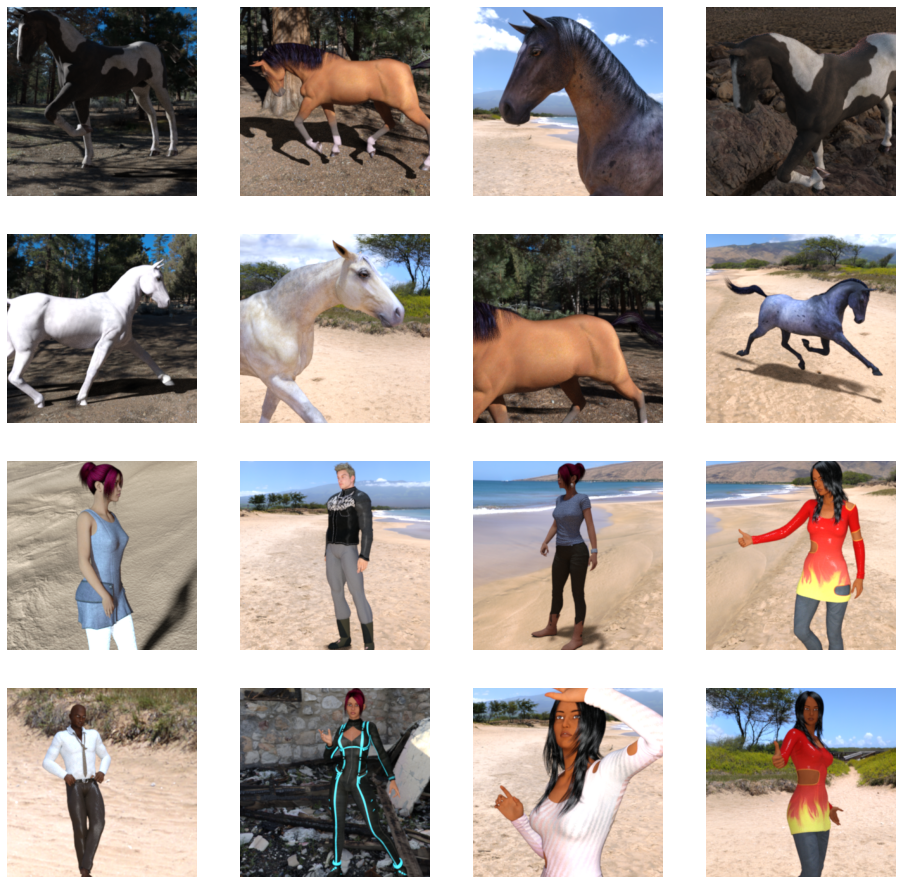

In [17]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

for i, img_path in enumerate(next_horse_pix + next_human_pix):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)


### Model

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [19]:
model = tf.keras.models.Sequential([
    # Warstwa 1 - 16 map
    Conv2D(16, (3,3), activation = 'relu', input_shape = (300, 300, 3)),
    MaxPooling2D(2,2),
    # Warstwa 2 - 32 mapy
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Warstwa 3 - 64 mapy
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Warstwa 4 - 64 mapy
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Warstwa 5 - 64 mapy
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),
    # Transformacja rezultatu to pojedynczego wektora
    Flatten(),
    # Warstwa ukryta posiadająca 512 neuronów
    Dense(512, activation = 'relu'),
    # Jeden neuron wyjściowy, będzie generował wartości 0 lub 1, określając etykietę klasy
    Dense(1, activation = 'sigmoid')
])

In [20]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300, 300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 16s 659ms/step - loss: 0.6956 - accuracy: 0.5184
Epoch 2/15
8/8 [==============================] - 6s 856ms/step - loss: 1.0472 - accuracy: 0.6674
Epoch 3/15
8/8 [==============================] - 6s 737ms/step - loss: 0.4943 - accuracy: 0.8231
Epoch 4/15
8/8 [==============================] - 6s 742ms/step - loss: 0.1776 - accuracy: 0.9388
Epoch 5/15
8/8 [==============================] - 6s 729ms/step - loss: 0.1960 - accuracy: 0.9210
Epoch 6/15
8/8 [==============================] - 7s 839ms/step - loss: 0.1649 - accuracy: 0.9355
Epoch 7/15
8/8 [==============================] - 6s 851ms/step - loss: 0.3554 - accuracy: 0.8932
Epoch 8/15
8/8 [==============================] - 6s 724ms/step - loss: 0.0798 - accuracy: 0.9778
Epoch 9/15
8/8 [==============================] - 6s 846ms/step - loss: 0.0568 - accuracy: 0.9766
Epoch 10/15
8/8 [==============================] - 6s 731ms/step - loss: 0.0674 - accuracy: 0.9711
Epoch 11/15
8/8 [=

1/1 [==============================] - 0s 88ms/step


<ipython-input-26-d5bfb57b081c>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


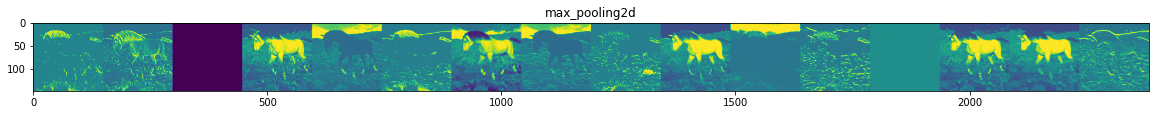

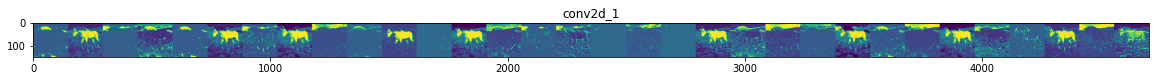

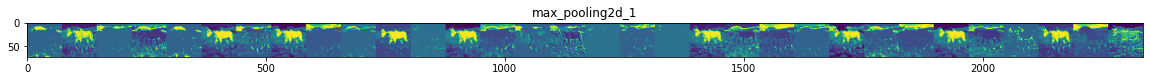

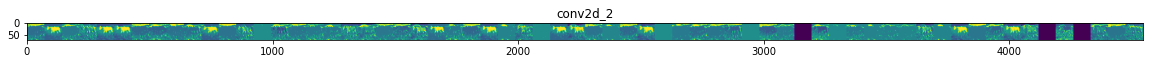

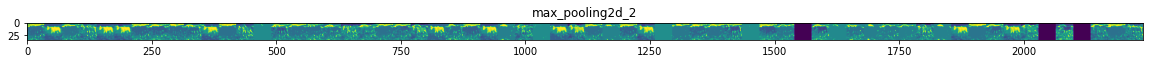

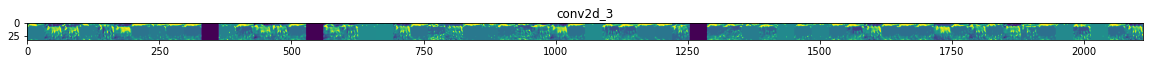

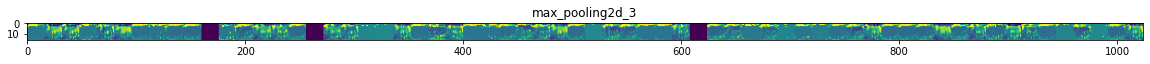

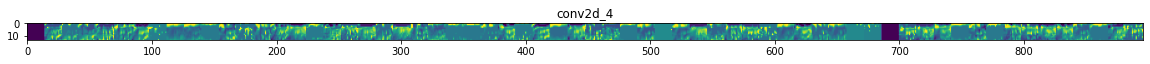

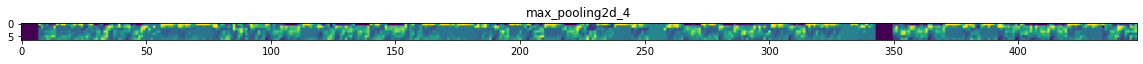

In [26]:


import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')